# Estudio de Caso - Modelos Probabilísticos
Una empresa de atención al cliente está evaluando la eficiencia de su servicio mediante el análisis del tiempo de atención telefónica. Los datos recopilados indican que el tiempo de atención sigue una distribución normal con una media de 10 minutos y una desviación estándar de 2 minutos. La gerencia desea conocer la probabilidad de que un cliente sea atendido en los siguientes casos:

• Menos de 8 minutos. 

• Entre 8 y 12 minutos.

• Más de 14 minutos.

Además, la empresa también recibe quejas por la cantidad de llamadas que se atienden en una hora. Los datos muestran que el número de llamadas entrantes sigue una distribución de Poisson con una media de 15 llamadas por hora. Se desea calcular la probabilidad de que en una hora se reciban:

• Exactamente 15 llamadas.

• Menos de 10 llamadas.

• Más de 20 llamadas.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Cálculo de probabilidad de tiempo de atención

In [4]:
media = 10
desviacion = 2

# Probabilidad de que la atención sea menor a 8 minutos
menor_8 = stats.norm.cdf(8, media,desviacion)
print(f"La probabilidad de que la atención sea menor a 8 minutos es de un {menor_8*100:.1f}%")

# Probabilidad de atención entre 8 y 12 minutos
entre_8_y_12 = stats.norm.cdf(12, media, desviacion) - stats.norm.cdf(8, media, desviacion)
print(f"La probabilidad de que la atención este entre 8 y 12 minutos es de un {entre_8_y_12*100:.1f}%")

# Probabilidad más de 14 minutos
mayor_14 = 1 - stats.norm.cdf(14, media, desviacion)
print(f"La probabilidad de que la atención sea mayor a los 14 minutos es de un {mayor_14*100:.1f}%")

La probabilidad de que la atención sea menor a 8 minutos es de un 15.9%
La probabilidad de que la atención este entre 8 y 12 minutos es de un 68.3%
La probabilidad de que la atención sea mayor a los 14 minutos es de un 2.3%


### Gráfico Distribución Normal– Verificación empírica de la adecuación D. Normal

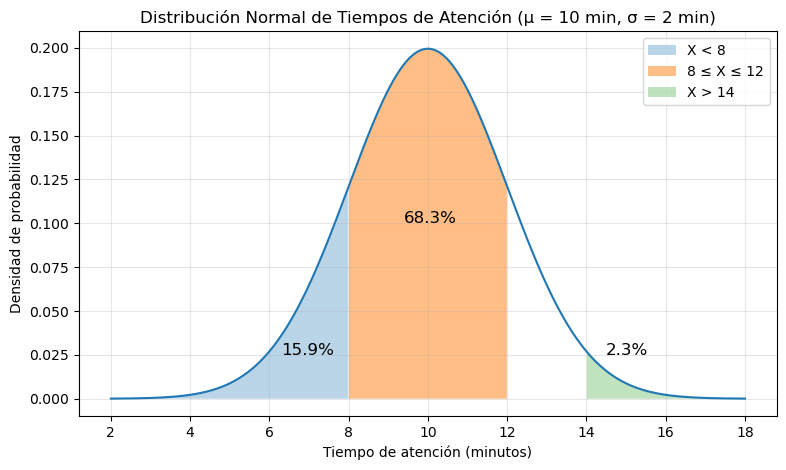

In [30]:
plt.figure(figsize=(9, 5))

#linspace: crea un arreglo con posibles valores de atención (limite inferior, limite superior, cantidad de puntos)
#promedio - 4*desv = liminte inferior
#promedio + 4*desv = limite supeior
#1000 = cantidad de puntos
x = np.linspace(media - 4*desviacion, media + 4*desviacion, 1000)

# pdf: determina la altura de la curva en un punto especifico del eje x (valores de x, media, desviación)
altura_densidad = stats.norm.pdf(x, media, desviacion)

# Curva del gráfico (valores en x, altura de densidad)
plt.plot(x, altura_densidad)

# Sombra región de problabilidades menores a 8 llamadas
plt.fill_between(x, 0, altura_densidad, where=(x < 8), alpha=0.3, label="X < 8")
plt.text(6.3, 0.025, f"{menor_8:.1%}", fontsize= 12, color="black")
# Sombra región de problabilidades entre 8 y 12 llamadas
plt.fill_between(x, 0, altura_densidad, where=((x >= 8) & (x <= 12)), alpha=0.5, label="8 ≤ X ≤ 12")
plt.text(9.4, 0.1, f"{entre_8_y_12:.1%}", fontsize=12, color="black")
# Sombra región de problabilidades más de 14 llamadas
plt.fill_between(x, 0, altura_densidad, where=(x > 14), alpha=0.3, label="X > 14")
plt.text(14.5, 0.025, f"{mayor_14:.1%}", fontsize=12, color="black")

# Detalles del gráfico
plt.title("Distribución Normal de Tiempos de Atención (μ = 10 min, σ = 2 min)")
plt.xlabel("Tiempo de atención (minutos)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Cálculo de probabilidad de llamadas recibidas por hora

In [31]:
media_llamadas = 15

# Probabilidad de que se reciban 15 llamadas en 1 hora
llamadas_15 = stats.poisson.pmf(15, media_llamadas)
print(f"La probabilidad de que se reciban 15 llamadas en una hora es de un {llamadas_15*100:.1f}%")

# Probabilidad de que se reciban menos de 10 llamadas en 1 hora
menos_10_llamadas = stats.poisson.cdf(9, media_llamadas)
print(f"La probabilidad de que se reciban menos de 10 llamadas en una hora es de un {menos_10_llamadas*100:.1f}%")

# Probabilidad de que se reciban más de 20 llamadas en 1 hora
mas_20_llamadas = 1 - stats.poisson.cdf(20, media_llamadas)
print(f"La probabilidad de que se reciban más de 20 llamadas en una hora es de un {mas_20_llamadas*100:.1f}%")

La probabilidad de que se reciban 15 llamadas en una hora es de un 10.2%
La probabilidad de que se reciban menos de 10 llamadas en una hora es de un 7.0%
La probabilidad de que se reciban más de 20 llamadas en una hora es de un 8.3%


## Gráfico Poisson – Verificación empírica de la adecuación Poisson
Simulamos 10 000 horas con λ = 15 llamadas/hora y comparamos el histograma con la probabilidad teórica.

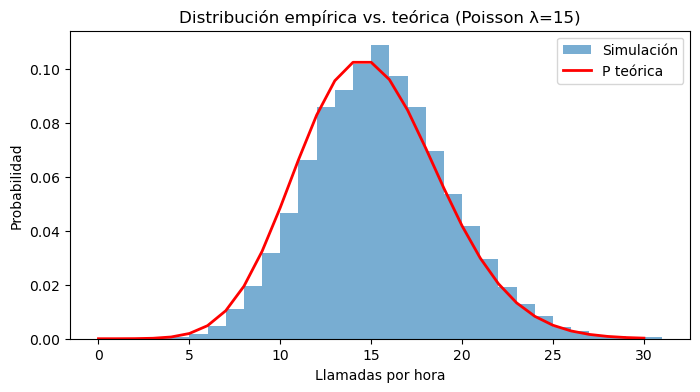

In [43]:
# Creación de modelo poisson
modelo = np.random.poisson(media_llamadas, size=10000)

plt.figure(figsize=(8, 4))

# Histograma de distribución de las simulaciones en el modelo de poisson
counts, bins, _ = plt.hist(modelo, bins=range(max(modelo)+2), density=True, alpha=0.6, label='Simulación')

# Valores que tomara el eje x
x = np.arange(0, max(modelo)+1)

# Curva de probabilidades teoricas de poisson
plt.plot(x, stats.poisson.pmf(x, media_llamadas), 'r-', lw=2, label='P teórica')

# Detalles del gráfico
plt.title('Distribución empírica vs. teórica (Poisson λ=15)')
plt.xlabel('Llamadas por hora')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

### ¿Por qué la distribución normal es adecuada para modelar el tiempo de atención al cliente?

La distribución normal es la adecuada para modelar el tiempo de atención al cliente porque esta es un tipo de variable aleatoria continua que toma valores dentro de un rango amplio. Además, en variables como tiempos de espera o atención, los datos tienden a agruparse alrededor de un valor promedio, con una menor frecuencia hacia los extremos, lo que precisamente representa la distribución normal, por lo que es la ideal para modelar probabilidades en los tiempos de atención al cliente.

### ¿Cuál es la probabilidad de que un cliente sea atendido en menos de 8 minutos? (Use la distribución normal y estándares de probabilidad)

La probabilidad de que un cliente sea atendido en menos de 8 minutos, siguiendo un modelo probabílistico a partir de una distribución normal es de un 15.9 %.

### ¿Por qué la distribución de Poisson es adecuada para modelar el número de llamadas en una hora?

La distribución de Poisson es adecuada para modelar el número de llamadas en una hora porque permite representar eventos que ocurren de forma aleatoria, pero con una frecuencia promedio conocida, dentro de un periodo de tiempo fijo. Esto encaja bien con el caso de estudio, donde se busca estimar la probabilidad de recibir cierta cantidad de llamadas por hora, sabiendo que en promedio se reciben 15. Por lo tanto, este escenario se adecua correctamente con una distribución de Poisson.

### ¿Cuál es la probabilidad de recibir exactamente 15 llamadas en una hora?

La probabilidad de recibir exactamente 15 llamadas en una hora es de una 10.2 %, según el modelo probabilístico de poisson.

### ¿Cómo podría la empresa utilizar estos análisis para mejorar su servicio de atención al cliente?

La empresa podría utilizar estos análisis para optimizar la cantidad de operarios disponibles según la demanda esperada. Este mismo enfoque se puede aplicar en horarios valle o punta, así como en días de semana, fines de semana o festivos, permitiendo estimar con mayor precisión la probabilidad de recibir ciertas cantidades de llamadas en distintos momentos. Con esta información, se pueden hacer ajustes más eficientes en la planificación del personal, lo que ayudaría a reducir los tiempos de espera y mejorar la experiencia general del cliente, aumentando así su satisfacción con el servicio.